# Hiperparâmetro x Parâmetro

- Parâmetro: Sâo calculados pelo algoritimo.
    * Ex: coeficientes da regressão linear

- Hiperparâmetro: São ajustados antes do modelo (devem ser encontrados e otimizados).
    * Ex: valores ajustáveis do algoritimo antes do fit -> profundidade da árvores.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier()

DecisionTreeClassifier()

# Otimização de Hiperparâmetros

Problema? 

> A complexidade cresce rapidamente com o número de hiperparâmetros e seus valores possíveis.

# Grid Search

Talvez a primeira coisa que qualquer pessoa pense ao se deparar com esse problema é criar listas de parâmetros e testar todas as combinações possíveis. Logo, ao tentar otimizar 2 hiperparâmetros com três possibilidades em cada, testaremos então $3 \times 3 = 9$ modelos. O modelo que tiver melhor desempenho, será o escolhido.

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/14f61637-c80b-4ec3-8a1f-0c6e547ecb8d.png" style="height: 250px"/>

## Plano

1. ler dataset titanic
2. Criar features (X) e target (y)
3. Dividir dataset em treino e teste
4. Aplicar tecnicas das aulas anteriores para missing values e categorias
5. Treinar um modelo. **Qual?**
6. avaliar o modelo: **qual métrica?**

e finalmente...

7. Fazer o grid search
8. Discussão!

In [4]:
# passo 1
import pandas as pd
import numpy as np 

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# passo 2
X = df[['Sex', 'Age', 'Fare']].copy()
y = df['Survived'].copy()

In [7]:
# passo 3
from sklearn.model_selection import train_test_split

X_train_tmp, X_test, y_train_tmp, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

print(X_train_tmp.shape, X_test.shape, y_train_tmp.shape, y_test.shape)

(623, 3) (268, 3) (623,) (268,)


In [8]:
# create validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_tmp, y_train_tmp, test_size=0.3, random_state=13)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(436, 3) (187, 3) (436,) (187,)


In [9]:
# passo 4

X_train['Sex'].value_counts()

male      287
female    149
Name: Sex, dtype: int64

In [10]:
# passo 4
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()

X_train = X_train.copy()
X_val = X_val.copy()
X_test = X_test.copy()

ordinal.fit(X_train[['Sex']])

X_train['Sex'] = ordinal.transform(X_train[['Sex']])
X_val['Sex'] = ordinal.transform(X_val[['Sex']])
X_test['Sex'] = ordinal.transform(X_test[['Sex']])

# warnings são incompatibilidade entre pandas e sklearn!

In [11]:
X_train['Sex'].value_counts()

1.0    287
0.0    149
Name: Sex, dtype: int64

In [12]:
# passo 4 continuação
X_train.isnull().sum()

Sex      0
Age     95
Fare     0
dtype: int64

In [13]:
# passo 4 continuação
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

imputer.fit(X_train[['Age']])

X_train['Age'] = imputer.transform(X_train[['Age']])
X_val['Age'] = imputer.transform(X_val[['Age']])
X_test['Age'] = imputer.transform(X_test[['Age']])

# warnings são incompatibilidade entre pandas e sklearn!

In [14]:
# passo 5
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
# passo 6: qual métrica?
y.value_counts(dropna=False, normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [16]:
# passo 6
from sklearn.metrics import roc_auc_score

y_pred = model.predict_proba(X_val)

roc_auc_score(y_val, y_pred[:,1])

0.7475109276347742

In [28]:
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier()

cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=2)

array([0.70343073, 0.72650698])

In [17]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## Otimizar os hiperparâmetros

In [23]:
# passo: 7
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()

hyper_params = {'max_depth': [3,5,7,10],
                 'max_leaf_nodes': [10, 20, 30]}

gscv = GridSearchCV(estimator=model, param_grid=hyper_params, scoring='roc_auc', cv=2)

gscv.fit(X_train, y_train)

gscv

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_leaf_nodes': [10, 20, 30]},
             scoring='roc_auc')

In [24]:
gscv

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_leaf_nodes': [10, 20, 30]},
             scoring='roc_auc')

In [25]:
gscv.best_params_

{'max_depth': 3, 'max_leaf_nodes': 10}

In [26]:
gscv.best_score_

0.8012634903922085

In [29]:
gscv.cv_results_

{'mean_fit_time': array([0.00355256, 0.00274563, 0.00248504, 0.00217497, 0.00300896,
        0.00150359, 0.00201952, 0.00250065, 0.00250554, 0.00197458,
        0.00251567, 0.00302815]),
 'std_fit_time': array([5.48958778e-04, 2.52962112e-04, 5.21183014e-04, 1.39355659e-04,
        9.92655754e-04, 4.67896461e-04, 1.51395798e-05, 5.01513481e-04,
        5.05924225e-04, 2.40802765e-05, 5.17725945e-04, 2.24113464e-05]),
 'mean_score_time': array([0.00599527, 0.00419974, 0.00268567, 0.00275767, 0.00348365,
        0.00398576, 0.00199938, 0.00349772, 0.00249505, 0.00153399,
        0.00298822, 0.00347555]),
 'std_score_time': array([9.98020172e-04, 7.29560852e-05, 6.38127327e-04, 7.95006752e-04,
        5.20586967e-04, 1.02365017e-03, 7.62939453e-06, 4.96268272e-04,
        4.94003296e-04, 4.67061996e-04, 1.02388859e-03, 5.27739525e-04]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,

param_max_leaf_nodes,10,20,30
param_max_depth,,,
3,0.801263,0.801263,0.801263
5,0.748267,0.748267,0.728613
7,0.748267,0.728262,0.727209
10,0.748267,0.710955,0.734250


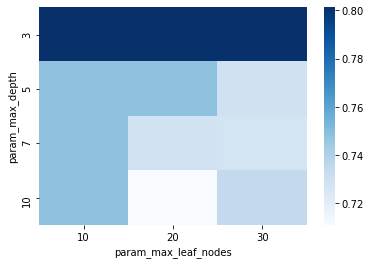

In [32]:
import pandas as pd
import seaborn as sns

pvt = pd.pivot_table(pd.DataFrame(gscv.cv_results_),
    values='mean_test_score', index='param_max_depth', columns='param_max_leaf_nodes')
sns.heatmap(pvt, cmap='Blues')
pvt

## Exercicio

Vamos testar e otimizar outro modelo?

Crie um modelo `random forest` para os dados que já temos no problema do titanic, meça sua performance e em seguida utilize o grid search para otimizar 3 hiperparâmetros de sua escolha. 

**Para pensar:** Quais hiperparâmetros podem ser utlizados?

In [37]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(random_state=13)

grid_search = {
    'max_depth': np.arange(5,20,1),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': np.arange(2, 10, 1)
}

gscv = GridSearchCV(estimator= modelo,
                    param_grid= grid_search, 
                    scoring='roc_auc' ,
                    cv=3)

gscv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=13),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='roc_auc')

In [40]:
gscv.best_score_

0.8355177818614203

In [42]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 2}

# Random Search

Funciona de forma muito similar ao Grid Search, criando um grid de parâmetros a serem testados. Porém, com a diferença de que a seleção dos valores escolhidos para teste é *aleatória* dado um conjunto de possibilidades. Ao invés de testar todos com todos, essa metodologia escolhe um valor ao acaso a partir de um conjunto pré-determinado. Mas uma escolha aleatória trás ganho?

Sim! [Alguns pesquisadores](https://s3-sa-east-1.amazonaws.com/lcpi/879e38fe-51f5-4f0e-abf1-339de202611b.pdf) perceberam que o Grid Search trás um problema na otimização dos valores: vamos supor que estamos testando os hiperparâmetros W, X, Y e Z, sendo $w$, $x$, $y$ e $z$ a quantidade de valores que cada hiperparâmetro receberá. Porém, modificar o W, por exemplo, trará uma variação desprezível no resultado do nosso modelo. Mas mesmo assim, por estar especificada no Grid Search, essa metodologia irá testar $ w \times x \times y \times z$, o que pode ser um desperdício. 

Além disso, ao especificar pontos estamos colocando um viés e pode ser que acabemos por não explorar espaços com máximos locais.

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/ccb2c843-3e26-4f56-bca5-e380d6964751.png" style="height: 250px"/>


In [55]:
from sklearn.model_selection import RandomizedSearchCV


modelo = RandomForestClassifier()

grid_search = {
    'max_depth': np.arange(5,20,1),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': np.arange(2, 10, 1)
}

rscv = RandomizedSearchCV(estimator=modelo, param_distributions=grid_search, 
                          n_iter=5, cv=2, scoring='roc_auc')

rscv.fit(X_train, y_train)

rscv

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   scoring='roc_auc')

In [56]:
rscv.best_score_

0.8291216986926384

In [57]:
rscv.best_params_

{'min_samples_split': 6, 'max_depth': 6, 'criterion': 'gini'}

In [60]:
modelo = RandomForestClassifier()

grid_search = {
    'max_depth': np.arange(10,100,1),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': np.arange(5, 50, 1)
}

rscv = RandomizedSearchCV(estimator=modelo, param_distributions=grid_search, 
                          n_iter=5, cv=2, scoring='roc_auc')

rscv.fit(X_train, y_train)

rscv.best_score_

0.8290778274984645

In [61]:
rscv.best_params_

{'min_samples_split': 33, 'max_depth': 69, 'criterion': 'entropy'}

## Exercicio

Otimize seu modelo de `random_forest` usando o random search.